# Dataset Prepartion
## Dataset Loading
### Load the JSON files into Data Frame

In [1]:
import os
import pandas as pd

# Get the current directory
current_dir = os.getcwd()

# Define the relative file paths
fashion_json = os.path.join(current_dir, '../../data/raw_data/AMAZON_FASHION_5.json')
phones_json = os.path.join(current_dir, '../../data/raw_data/Cell_Phones_and_Accessories_5.json')
grocery_json = os.path.join(current_dir, '../../data/raw_data/Grocery_and_Gourmet_Food_5.json')

# Read JSON files into DataFrames
df_fashion = pd.read_json(fashion_json, lines=True)
df_phones = pd.read_json(phones_json, lines=True)
df_grocery = pd.read_json(grocery_json, lines=True)

### Combine the Datasets

In [2]:
# Combine the datasets
df = pd.concat([df_fashion, df_phones, df_grocery], ignore_index=True)
print("\nTotal number of reviews: ",df.shape[0])
df.head()


Total number of reviews:  2275473


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
1,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
2,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
3,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
4,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN


## Field Selection

In [3]:
df = df.rename({"reviewText" : "Reviews"}, axis=1)
df = df.rename({"overall" : "Score"}, axis=1)
df = df [["Score", "Reviews"]]
df.head()

,Score,Reviews
0,5,Great product and price!
1,5,Great product and price!
2,5,Great product and price!
3,5,Great product and price!
4,5,Great product and price!


## Missing and Duplicate Data Checks

In [4]:
# Check for Missing Data
print("Missing data:\n", df.isnull().sum())

Missing data:
 Score         0
Reviews    1171
dtype: int64


In [5]:
# Drop Missing Data
df.dropna(inplace=True)
print("Missing data:\n", df.isnull().sum())

Missing data:
 Score      0
Reviews    0
dtype: int64


In [6]:
def duplicate_checker(df):
    # Check how many reviews are duplicates
    duplicate_count = df.duplicated(subset='Reviews').sum()
    
    # Identify the specific rows that are duplicates of one another
    duplicate_reviews = df[df.duplicated(subset='Reviews')]
    
    print("Number of duplicate reviews:", duplicate_count)
    print(duplicate_reviews['Reviews'])

duplicate_checker(df)

Number of duplicate reviews: 459393
1                 Great product and price!
2                 Great product and price!
3                 Great product and price!
4                 Great product and price!
7          Stays vibrant after many washes
                        ...               
2275440                          Delicious
2275445                                 :)
2275447                          Excellent
2275462          Great price, great taste.
2275467     My daughter in law loves this.
Name: Reviews, Length: 459393, dtype: object


In [7]:
# Remove the duplicates but keep the first instance
df.drop_duplicates(subset='Reviews', keep='first', inplace=True)
duplicate_checker(df)

Number of duplicate reviews: 0
Series([], Name: Reviews, dtype: object)


## Feedback Mapping of Scores

In [8]:
import numpy as np                       # MD array and Matrices

conditions = [
    (df['Score'] >= 4),
    (df['Score'] == 3),
    (df['Score'] <= 2)
    ]
feedback_values = ['Positive',
                   'Neutral',
                   'Negative']
df['Feedback'] = np.select(conditions, feedback_values)


feedback_counts = df['Feedback'].value_counts()
print(feedback_counts)

Feedback
Positive    1448550
Negative     209340
Neutral      157019
Name: count, dtype: int64


<Axes: xlabel='Feedback'>

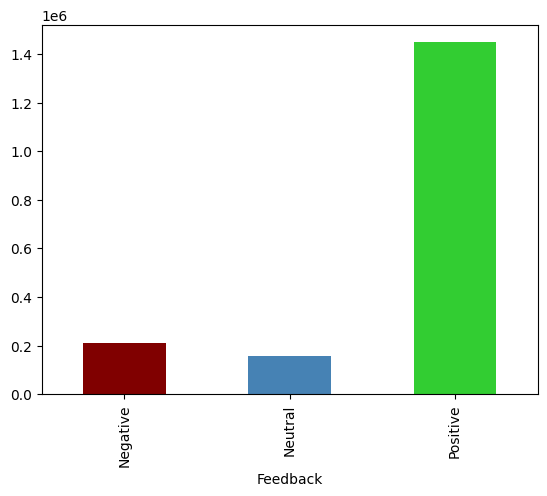

In [9]:
import matplotlib.pyplot as plt  # Data Visualization

df['Feedback'].value_counts().sort_index().plot.bar(color=['maroon', 'steelblue', 'limegreen'])

In [10]:
print("Total number of reviews:",df.shape[0])
df.head()

Total number of reviews: 1814909


,Score,Reviews,Feedback
0,5,Great product and price!,Positive
5,3,Waaay too small. Will use for futur children!,Neutral
6,5,Stays vibrant after many washes,Positive
8,5,My son really likes the pink. Ones which I was...,Positive
9,3,Waaay too small. Will use for future child.,Neutral


# Data Preprocessing

In [1]:
import sys
sys.path.append('..')
from data_preprocess import text_cleaner, stop_words

#Test the imported module
text = "I’m never gonna give you up. But I shouldn't say that I can't bear to lose you.\n https://youtube.com <strong> Bold and brash </strong> \n<a href='https://www.w3schools.com'>Visit W3Schools</a>"
cleaned_words = text_cleaner(text)
print(cleaned_words)

i am never going to give should not say cannot bear lose bold brash visit w3schools


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aerienn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df['Reviews'] = df['Reviews'].apply(text_cleaner)

NameError: name 'df' is not defined

In [ ]:
# Check for missing data again isn't substantial that text cleaner wiped it out.
print("Missing data:\n", df.isnull().sum())

In [13]:
# Drop Missing Data
df.dropna(inplace=True)
print("Missing data:\n", df.isnull().sum())

Missing data:
 Score       0
Reviews     0
Feedback    0
dtype: int64
Missing data:
 Score       0
Reviews     0
Feedback    0
dtype: int64


In [14]:
df.head(20)

,Score,Reviews,Feedback
0,5,great product price,Positive
5,3,waaay small use futur children,Neutral
6,5,stays vibrant many washes,Positive
8,5,son really likes pink ones nervous,Positive
9,3,waaay small use future child,Neutral
10,2,relieved plantar fascitis 3 days unbearable pa...,Negative
11,2,6th pair best thing ever plantar fasciitis res...,Negative
12,5,used inserts years provide great support,Positive
13,5,pinnacle seems cushioning husband likes better...,Positive
14,5,excellent insole good support,Positive


In [15]:
# Save the DataFrame to the new CSV file
df.to_csv(os.path.join(current_dir, '../../data/processed_data/prep_reviews.csv'), index=False)

# PROCEED TO MODEL TRAINING